### 1.	Read in auto.csv file into a dataframe, and call it Auto.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
pathname = 'data/'
#Auto = pd.read_csv(pathname + "AUTO.csv",sep=",") 
#print(tweet_frame.shape)
#print(list(tweet_frame)) #equivalent of showing the headers of a data frame

### When I tried to read the csv file, it gave me this error "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 7386: invalid start byte"

Checked Stackoverflow and got following script to find out if there are any encodings where b'\x96' decodes to  ñ

In [2]:
import pkgutil
import encodings
import os

def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

text = b'\x96'
for enc in all_encodings():
    try:
        msg = text.decode(enc)
    except Exception:
        continue
    if msg == 'ñ':
        print('Decoding {t} with {enc} is {m}'.format(t=text, enc=enc, m=msg))

Decoding b'\x96' with mac_iceland is ñ
Decoding b'\x96' with mac_romanian is ñ
Decoding b'\x96' with mac_arabic is ñ
Decoding b'\x96' with mac_croatian is ñ
Decoding b'\x96' with mac_turkish is ñ
Decoding b'\x96' with mac_farsi is ñ
Decoding b'\x96' with mac_roman is ñ


C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: unicode_internal codec has been deprecated
  


 ### The answer is : "ñ character is not listed on UTC-8 encoding. Using ISO-8859-1 encoding to fix this isse"
 https://stackoverflow.com/questions/21504319/python-3-csv-file-giving-unicodedecodeerror-utf-8-codec-cant-decode-byte-err
 
 Therfore, I used "encoding='ISO-8859-1'" parameter in pandas' read_csv() function to load the "AUTO.csv" file.

In [3]:
# reading AUTO.csv
Auto = pd.read_csv(pathname + "AUTO.csv",encoding='ISO-8859-1') 

In [4]:
# showing first five rows of Auto data frame
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [5]:
# showing last five rows of Auto data frame
Auto.tail()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dimension of the data frame
Auto.shape

(190, 18)

### So, 190 observations(rows) with 18 variables(columns) in the Auto dataframe.

In [7]:
# columns of the data frame
print("Colums Names", Auto.columns)

Colums Names Index(['Name', 'Drive Type', 'Mileage (mpg)', 'Fuel Type', 'Capacity (gal)',
       'Length (inches)', 'Wheel Base (inches)', 'Width (inches)',
       'Turning Circle (feet)', 'Weight (lbs)', 'Door Top (inches)',
       'Luggage (cu. ft.)', 'Front Shoulder (inches)',
       'Front Leg Room (inches)', 'Front Head Room (inches)',
       'Rear Shoulder (inches)', 'Rear Leg Room (inches)',
       'Rear Head Room (inches)'],
      dtype='object')


In [8]:
#some information about the number of rows, columns, column data types, memory usage, etc. in the Auto DataFrame
print(Auto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
Name                        106 non-null object
Drive Type                  106 non-null object
Mileage (mpg)               106 non-null float64
Fuel Type                   106 non-null object
Capacity (gal)              106 non-null float64
Length (inches)             106 non-null float64
Wheel Base (inches)         106 non-null float64
Width (inches)              106 non-null float64
Turning Circle (feet)       106 non-null float64
Weight (lbs)                106 non-null object
Door Top (inches)           106 non-null float64
Luggage (cu. ft.)           104 non-null float64
Front Shoulder (inches)     106 non-null float64
Front Leg Room (inches)     106 non-null float64
Front Head Room (inches)    106 non-null float64
Rear Shoulder (inches)      106 non-null float64
Rear Leg Room (inches)      106 non-null float64
Rear Head Room (inches)     106 non-null float64
dtypes: float64(1

#### As we can see in above output, "Name","Drive Type", "Fuel Type", and "Weight (lbs)" are categorical variables(4) with Object type. All other variables(14) are numeric variables with float type. Total 190 observations where 106 observations have non-null values.

In [9]:
# showing variables by type for clear visibility
Auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

### 2.	Replace any missing values with the median value of the variable (feature).

In [10]:
# showing columns with missing values
nulls = Auto.isnull().sum()
nulls[nulls > 0]

Name                        84
Drive Type                  84
Mileage (mpg)               84
Fuel Type                   84
Capacity (gal)              84
Length (inches)             84
Wheel Base (inches)         84
Width (inches)              84
Turning Circle (feet)       84
Weight (lbs)                84
Door Top (inches)           84
Luggage (cu. ft.)           86
Front Shoulder (inches)     84
Front Leg Room (inches)     84
Front Head Room (inches)    84
Rear Shoulder (inches)      84
Rear Leg Room (inches)      84
Rear Head Room (inches)     84
dtype: int64

In [11]:
# finding meadian value of each column
Auto.median()

Mileage (mpg)                21.0
Capacity (gal)               17.4
Length (inches)             188.0
Wheel Base (inches)         107.0
Width (inches)               70.0
Turning Circle (feet)        40.0
Door Top (inches)            51.0
Luggage (cu. ft.)            16.0
Front Shoulder (inches)      56.0
Front Leg Room (inches)      41.0
Front Head Room (inches)      4.5
Rear Shoulder (inches)       56.0
Rear Leg Room (inches)       28.5
Rear Head Room (inches)       3.0
dtype: float64

In [12]:
# replacing all missing values by median values of all numeric variables
Auto.fillna(Auto.median(), inplace=True)

In [13]:
# checking the result by seeing last five rows
Auto.tail()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
185,NaN,NaN,21.0,NaN,17.4,188.0,107.0,70.0,40.0,NaN,51.0,16.0,56.0,41.0,4.5,56.0,28.5,3.0
186,NaN,NaN,21.0,NaN,17.4,188.0,107.0,70.0,40.0,NaN,51.0,16.0,56.0,41.0,4.5,56.0,28.5,3.0
187,NaN,NaN,21.0,NaN,17.4,188.0,107.0,70.0,40.0,NaN,51.0,16.0,56.0,41.0,4.5,56.0,28.5,3.0
188,NaN,NaN,21.0,NaN,17.4,188.0,107.0,70.0,40.0,NaN,51.0,16.0,56.0,41.0,4.5,56.0,28.5,3.0
189,NaN,NaN,21.0,NaN,17.4,188.0,107.0,70.0,40.0,NaN,51.0,16.0,56.0,41.0,4.5,56.0,28.5,3.0


#### As we can see in the output, all NaN values in numeric variables are replaced by their respective median values.

### 3.	Explore the general characteristics of the data, by computing the means and standard deviations of the numerical attributes, as well as the distributions of “drive type” and “fuel type” (both are categorical).  You can do this for each individual variable separately or a function to compute for the entire data frame (or both). 

In [14]:
# Mean value of the numerical variables for the entire data frame
Auto.mean()

Mileage (mpg)                21.163158
Capacity (gal)               17.669474
Length (inches)             187.773684
Wheel Base (inches)         107.352632
Width (inches)               70.510526
Turning Circle (feet)        39.915789
Door Top (inches)            52.613158
Luggage (cu. ft.)            21.052632
Front Shoulder (inches)      56.263158
Front Leg Room (inches)      41.142105
Front Head Room (inches)      4.381579
Rear Shoulder (inches)       55.300000
Rear Leg Room (inches)       28.423684
Rear Head Room (inches)       3.013158
dtype: float64

In [15]:
# Standard Deviation value of the numerical variables for the entire data frame
Auto.std()

Mileage (mpg)                2.813368
Capacity (gal)               2.564680
Length (inches)              9.314399
Wheel Base (inches)          5.237923
Width (inches)               2.455400
Turning Circle (feet)        2.086303
Door Top (inches)            4.519398
Luggage (cu. ft.)           14.320587
Front Shoulder (inches)      2.279239
Front Leg Room (inches)      0.772076
Front Head Room (inches)     0.959733
Rear Shoulder (inches)       5.336507
Rear Leg Room (inches)       1.638885
Rear Head Room (inches)      1.021507
dtype: float64

In [16]:
# distributions of “drive type”: using pandas' size() function to count by Drive type .
Auto.groupby('Drive Type').size()

Drive Type
Front    81
Rear     25
dtype: int64

In [17]:
Auto['Drive Type'].value_counts()

Front    81
Rear     25
Name: Drive Type, dtype: int64

In [18]:
# distributions of “fuel type”: using pandas' size() function to count by Fuel type 
Auto.groupby('Fuel Type').size()

Fuel Type
Premium     19
Regular     86
Regular      1
dtype: int64

As we can see, there are two Regular class and with little analysis,I found one particular observation has 1 space after "Regular ", therefore, I'm removing that space.

In [19]:
# stripping the space after Regular to have only two class "Regular" and "Premium"
Auto["Fuel Type"] = Auto["Fuel Type"].str.strip()

In [20]:
# Crosstab using Pandas
auto_cross=pd.crosstab(Auto['Drive Type'], Auto['Fuel Type'],colnames=['Drive Type'],rownames=['Fuel Type'])
print(auto_cross)

Drive Type  Premium  Regular
Fuel Type                   
Front            11       70
Rear              8       17


Text(0.5, 1.0, 'Drive by fuel')

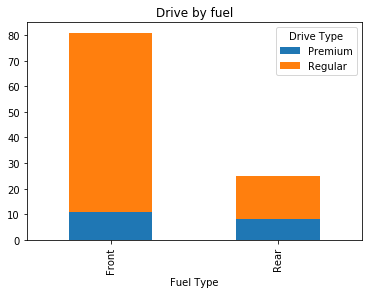

In [21]:
# Bar plot of fuel  by drive
auto_cross.plot(kind='bar', stacked=True)
plt.title('Drive by fuel')

### 4.	Use z-score normalization to standardize the values of the Weight attribute. Show the results side-by-side with the original Weight attribute. [Do not change the original Weight attribute in the table.] Alternatively you may choose to use a [0,1] Min-Max Normalization.You can create this by a manual calculation or use the sklearn.preprocessing package. http://scikit-learn.org/stable/modules/classes.html - module-sklearn.preprocessing

In [22]:
# Pandas has a helpful select_dtypes function which we can use to build a new dataframe containing only a specific type variable
# creating a new dataframe containing only the object columns(categorical variables).

obj_df = Auto.select_dtypes(include=['object']).copy()

# I covered this question using 2 ways 
# One is by dropping the empty rows at file-end
obj_df.dropna(how="all", inplace=True)

#  displaying first 5 rows
obj_df[:5]

,Name,Drive Type,Fuel Type,Weight (lbs)
0,Acura Integra,Front,Regular,"2,635"
1,Acura TL,Front,Premium,"3,460"
2,Buick Century,Front,Regular,"3,350"
3,Buick LeSabre,Front,Regular,"3,640"
4,Buick Park Avenue,Front,Regular,"3,880"


In [23]:
# displaying last 5 rows
obj_df.tail()


,Name,Drive Type,Fuel Type,Weight (lbs)
101,Suzuki Vitara,Rear,Regular,"3,230"
102,Chevrolet Tracker,Rear,Regular,"3,055"
103,Ford Expedition,Rear,Regular,"5,290"
104,Isuzu Rodeo,Rear,Regular,"3,935"
105,Lincoln Navigator,Rear,Regular,"5,850"


#### No null values in the data frame but our weight variable has commas in their values so, removing commas and then changing it into numeric type to be able to calculate the z-score of this field

In [24]:
# stripping comma from the weight values
obj_df['Weight (lbs)'] = obj_df['Weight (lbs)'].str.replace(',', '')

In [25]:
# change the type of the column
obj_df["Weight (lbs)"] = obj_df["Weight (lbs)"].astype('float')

In [26]:
# checking the descriptive statistics of weight column
obj_df["Weight (lbs)"].describe()

count     106.000000
mean     3502.311321
std       633.453939
min      2420.000000
25%      3106.250000
50%      3395.000000
75%      3890.000000
max      5850.000000
Name: Weight (lbs), dtype: float64

In [27]:
# last few rows of the data frame
obj_df["Weight (lbs)"].tail() 

101    3230.0
102    3055.0
103    5290.0
104    3935.0
105    5850.0
Name: Weight (lbs), dtype: float64

In [28]:
# standardizing the value of weight attribute.
obj_df['wgt_z'] = pd.DataFrame((obj_df["Weight (lbs)"]-(obj_df["Weight (lbs)"].mean())/(obj_df["Weight (lbs)"].std())))

In [29]:
# viewing first 5 rows standardized column
obj_df.iloc[:,3:5][:5]

,Weight (lbs),wgt_z
0,2635.0,2629.471088
1,3460.0,3454.471088
2,3350.0,3344.471088
3,3640.0,3634.471088
4,3880.0,3874.471088


In [30]:
#Showing the results of standardized weight side-by-side with the original Weight attribute for last 5 rows
obj_df.iloc[:,3:5][101:]

,Weight (lbs),wgt_z
101,3230.0,3224.471088
102,3055.0,3049.471088
103,5290.0,5284.471088
104,3935.0,3929.471088
105,5850.0,5844.471088


In [31]:
# another way is not dropping all NaN values from the object data frame
obj_df = Auto.select_dtypes(include=['object']).copy()
# stripping comma from the weight values
obj_df['Weight (lbs)'] = obj_df['Weight (lbs)'].str.replace(',', '')
# change the type of the column
obj_df["Weight (lbs)"] = obj_df["Weight (lbs)"].astype('float')
# find the median and replace all null values with it
# replacing all missing values by median values of all numeric variables
obj_df.fillna(obj_df["Weight (lbs)"].median(), inplace=True)
# standardizing the value of weight attribute.
obj_df['wgt_z'] = pd.DataFrame((obj_df["Weight (lbs)"]-(obj_df["Weight (lbs)"].mean())/(obj_df["Weight (lbs)"].std())))
#Showing the results of standardized weight side-by-side with the original Weight attribute for last 5 rows
obj_df.iloc[:,3:5].tail()

,Weight (lbs),wgt_z
185,3395.0,3387.729086
186,3395.0,3387.729086
187,3395.0,3387.729086
188,3395.0,3387.729086
189,3395.0,3387.729086


#### As we can see, values in both columns will be different in each case, of course ...

### 5.	Convert the categorical variables into dummies. Note that this requires converting each categorical attribute into multiple attributes (dummies) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record. 

In [37]:
# # replacing NAN values in Drive type with "Front "
# obj_df = Auto.select_dtypes(include=['object']).copy()

# # again I covered it 2 ways: one by replacing all NaN values by 
# obj_df["Drive Type"].fillna("Front", inplace = True) 
# obj_df

In [38]:
# replacing NAN values in Drive type with "Front "
#obj_df["Drive Type"].fillna("Front", inplace = True) 

In [39]:
#Dummies via Pandas
dt_dummy=pd.DataFrame(pd.get_dummies(obj_df['Drive Type']))
# displaying last 5 rows
dt_dummy[185:]

,Front,Rear
185,1,0
186,1,0
187,1,0
188,1,0
189,1,0


In [40]:
#using pandas, count by category for a categorical variable.
obj_df.groupby('Drive Type').size()

Drive Type
Front    165
Rear      25
dtype: int64

In [41]:
obj_df.dtypes

Name            object
Drive Type      object
Fuel Type       object
Weight (lbs)    object
dtype: object

In [42]:
obj_df["Fuel Type"] = obj_df["Fuel Type"].str.strip()

In [43]:
#obj_df["Fuel Type"]

In [44]:
# replacing NAN values in Fuel type with "Regular" 
#obj_df["Fuel Type"].fillna("Regular", inplace = True) 
# "Name" is another categorical variable. Let's see its group it by category:
 #obj_df.groupby('Name').size()

In [45]:
obj_df["Fuel Type"].describe()

count         106
unique          2
top       Regular
freq           87
Name: Fuel Type, dtype: object

In [46]:
#Dummies via Pandas
ft_dummy=pd.DataFrame(pd.get_dummies(obj_df['Fuel Type']))
#ft_dummy

In [47]:
#cleanup_nums = {"Fuel Type": {"Premium": 0, "Regular": 1,"Regular":1}}
#obj_df.replace(cleanup_nums, inplace=True)

In [48]:
# last few rows
obj_df.tail()

,Name,Drive Type,Fuel Type,Weight (lbs)
185,NaN,Front,NaN,NaN
186,NaN,Front,NaN,NaN
187,NaN,Front,NaN,NaN
188,NaN,Front,NaN,NaN
189,NaN,Front,NaN,NaN


In [49]:
#using pandas, count by category for a categorical variable.
obj_df.groupby('Fuel Type').size()

Fuel Type
Premium    19
Regular    87
dtype: int64

In [50]:
# I'm dropping "Name" variable, since it's not makins any difference besides we're creating any predictive model
#obj_df.drop(['Name'], axis=1)

In [51]:
obj_df.dtypes

Name            object
Drive Type      object
Fuel Type       object
Weight (lbs)    object
dtype: object

### 6.	Perform basic correlation analysis a correlation matrix) among the attributes. Perform both numeric and visual correlation outputs.

In [52]:
num_df = Auto.select_dtypes(include=['float64']).copy()
num_df[:10]

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,31.0,13.2,172.0,101.0,67.0,39.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,22.0,17.1,193.0,108.0,70.0,40.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,22.0,17.5,195.0,109.0,73.0,40.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,20.0,17.5,200.0,112.0,74.0,42.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,21.0,18.5,207.0,114.0,75.0,43.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0
5,21.0,17.5,196.0,109.0,73.0,40.0,50.5,17.0,58.0,43.0,5.0,56.5,29.0,2.5
6,26.0,15.2,181.0,104.0,68.0,38.0,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0
7,20.0,17.0,200.0,111.0,73.0,40.0,51.5,18.0,58.5,42.0,5.0,58.5,29.0,2.5
8,22.0,16.6,201.0,108.0,73.0,44.0,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0
9,24.0,15.2,190.0,107.0,69.0,40.0,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0


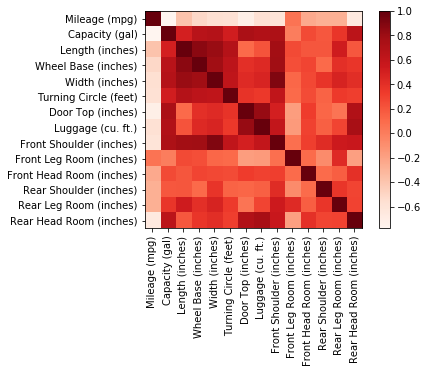

In [53]:
# Visual representation of correlation outputs 
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')

plt.imshow(num_df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(num_df.columns))]
plt.xticks(tick_marks, num_df.columns, rotation='vertical')
plt.yticks(tick_marks, num_df.columns)
plt.show()

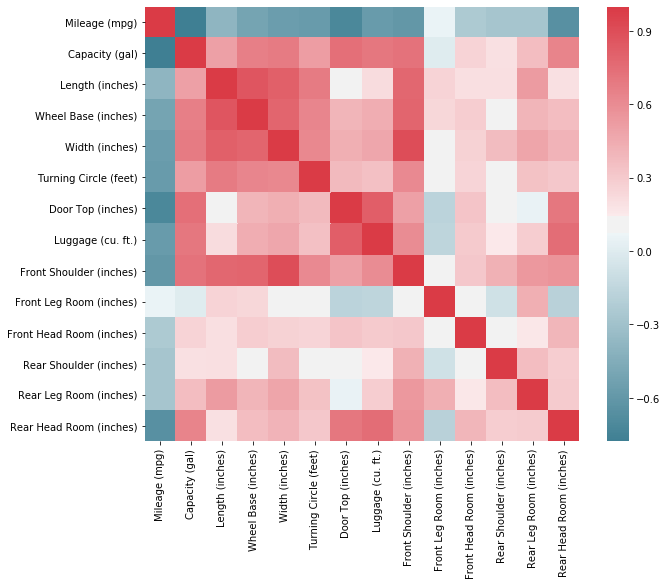

In [54]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = num_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [55]:
# correlation values for all 15 numeric variables
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(15, 15))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,-0.196089,0.203784,0.0187268,-0.156373,0.0843461,-0.640451,0.181295,-0.426156,0.497867,-0.163945,0.424858,-0.152443,0.0335004,-0.532987
1,-0.196089,1,-0.10829,0.196649,0.013398,0.0802216,0.165155,0.320075,0.388931,0.00314871,0.231546,-0.0834112,-0.0877556,0.203892,0.279335
2,0.203784,-0.10829,1,0.146937,0.382497,0.485465,-0.164531,0.0470172,0.411609,0.209683,0.486624,-0.163165,0.103643,-0.155193,-0.0775329
3,0.0187268,0.196649,0.146937,1,-0.0819936,0.43458,-0.311289,-0.0819178,0.242641,0.0341195,0.282288,-0.635867,0.436499,-0.0633908,-0.311914
4,-0.156373,0.013398,0.382497,-0.0819936,1,0.153003,0.296359,0.330063,-0.0228404,-0.113421,-0.0599414,-0.170677,-0.0312223,0.285531,0.0868846
5,0.0843461,0.0802216,0.485465,0.43458,0.153003,1,-0.0417862,0.431274,0.177903,0.205606,0.299209,-0.298761,0.210936,-0.0559747,0.0175512
6,-0.640451,0.165155,-0.164531,-0.311289,0.296359,-0.0417862,1,0.147467,0.122486,-0.407631,0.175992,0.0962238,0.35022,0.160278,0.408643
7,0.181295,0.320075,0.0470172,-0.0819178,0.330063,0.431274,0.147467,1,-0.14371,0.0845893,-0.166075,0.25759,-0.166664,-0.00535483,-0.154133
8,-0.426156,0.388931,0.411609,0.242641,-0.0228404,0.177903,0.122486,-0.14371,1,-0.0350223,0.67097,-0.446301,0.140785,-0.0362562,0.132505
9,0.497867,0.00314871,0.209683,0.0341195,-0.113421,0.205606,-0.407631,0.0845893,-0.0350223,1,-0.166674,0.221608,-0.0303152,-0.0266607,-0.0983142


### 7.	Using the new converted dataset- run a PCA. How much variation is captured in 3 Principle Components? (May I suggest you use this function from sklearn.decomposition import PCA)

### PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). I have put some references at the end of this post so that interested people can really delve into the mathematics of PCA.

In [58]:
import pandas as pd
import numpy as np
# reading AUTO.csv
pathname = 'data/'
Auto = pd.read_csv(pathname + "AUTO.csv",encoding='ISO-8859-1') 

Auto.dropna(how="all", inplace=True) # drops the empty line at file-end

Auto.tail()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
101,Suzuki Vitara,Rear,19.0,Regular,17.4,165.0,98.0,70.0,37.0,"3,230",60.5,28.0,53.0,39.0,4.5,52.5,24.0,4.5
102,Chevrolet Tracker,Rear,21.0,Regular,17.4,163.0,98.0,67.0,37.0,"3,055",60.0,28.0,53.0,39.0,4.5,52.5,24.0,4.5
103,Ford Expedition,Rear,13.0,Regular,30.0,205.0,119.0,79.0,42.0,"5,290",69.5,70.0,63.5,42.0,5.5,63.5,33.5,5.5
104,Isuzu Rodeo,Rear,18.0,Regular,21.1,177.0,106.0,70.0,41.0,"3,935",60.0,39.5,56.0,41.0,4.0,56.0,30.0,3.5
105,Lincoln Navigator,Rear,13.0,Regular,30.0,205.0,119.0,80.0,44.0,"5,850",68.0,67.0,63.5,41.5,6.0,63.5,32.0,5.5


In [59]:
Auto['Weight (lbs)'] = Auto['Weight (lbs)'].str.replace(',', '')
Auto["Weight (lbs)"] = Auto["Weight (lbs)"].astype('float')
Auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                float64
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [60]:
num_df = Auto.select_dtypes(include=['float64']).copy()
num_df[:5]

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,31.0,13.2,172.0,101.0,67.0,39.0,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,22.0,17.1,193.0,108.0,70.0,40.0,3460.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,22.0,17.5,195.0,109.0,73.0,40.0,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,20.0,17.5,200.0,112.0,74.0,42.0,3640.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,21.0,18.5,207.0,114.0,75.0,43.0,3880.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [62]:
# my target variable is Mileage whereas my predictors are Capacity,Length and Weight of auto
from sklearn.preprocessing import StandardScaler
df = Auto[['Capacity (gal)','Length (inches)','Weight (lbs)','Mileage (mpg)']]

predictors =['Capacity (gal)','Length (inches)','Weight (lbs)']
# Separating out the features
x = df.loc[:, predictors].values
# Separating out the target
#y = df.loc[:,['target']].values
y = df.loc[:,['Mileage (mpg)']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#df

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [64]:
finalDf = pd.concat([principalDf, df[['Mileage (mpg)']]], axis = 1)

In [65]:
pca.explained_variance_ratio_

array([0.77102805, 0.19226055, 0.03671141])

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 77.1% of the variance and the second principal component contains 19.22% of the variance. Together, the two components contain 96.03% of the information. Third principal component contains only 3.67% of the variance.

In [66]:
print(finalDf)

     principal component 1  principal component 2  principal component 3  \
0                -2.309779               0.127444              -0.022821   
1                 0.033442              -0.487633              -0.085619   
2                 0.076371              -0.634740               0.130234   
3                 0.560266              -0.842317              -0.179652   
4                 1.253314              -1.098852              -0.221132   
..                     ...                    ...                    ...   
101              -1.252616               1.387974               0.113202   
102              -1.504164               1.442279               0.304756   
103               4.615269               1.048442               0.479277   
104               0.578960               1.319281               0.107170   
105               5.165680               1.321094              -0.162347   

     Mileage (mpg)  
0             31.0  
1             22.0  
2             22.0  
3  

### 8.	Using Matplotlib library (or seaborn or both), create a scatter plot of the (non-normalized) Weight attribute relative to MPG. Be sure that your plot contains appropriate labels for the axes. 

In [67]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
#https://chrisalbon.com/python/data_visualization/seaborn_scatterplot/

Text(3.5060000000000002, 0.5, 'Miles per gallon')

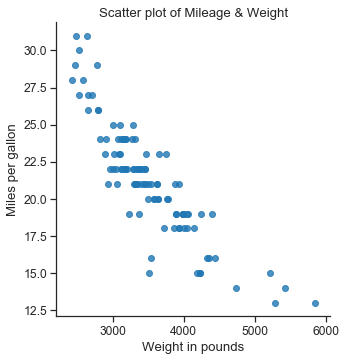

In [68]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Weight (lbs)', # Horizontal axis
           'Mileage (mpg)', # Vertical axis
           data=df, # Data source
           fit_reg=False)#, # Don't fix a regression line
           #hue='Stage')#, # Set color
           #scatter_kws={"marker": "D", # Set marker style
                        #"s": 100}) # S marker size

# Set title
plt.title('Scatter plot of Mileage & Weight')

# Set x-axis label
plt.xlabel('Weight in pounds')

# Set y-axis label
plt.ylabel('Miles per gallon')

### 9.	Using the hist function in Matplotlib (or Seaborn or both), create histograms for (non-normalized) Luggage (using 6 bins) and MPG (using 7 bins).

In [70]:
import pandas as pd
# reading AUTO.csv
pathname = 'data/'
Auto = pd.read_csv(pathname + "AUTO.csv",encoding='ISO-8859-1') 

Auto.dropna(how="all", inplace=True) # drops the empty line at file-end

Auto.head()
#Auto.dtypes

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


C:\Users\email\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\email\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


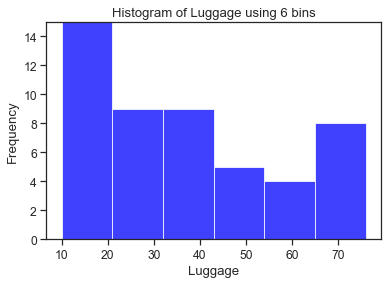

In [71]:
n, bins, patches = plt.hist(Auto['Luggage (cu. ft.)'], 6, facecolor='blue', alpha=0.75)
plt.ylim(0, 15)
plt.xlabel("Luggage")
plt.ylabel("Frequency")
plt.title('Histogram of Luggage using 6 bins')
plt.show()

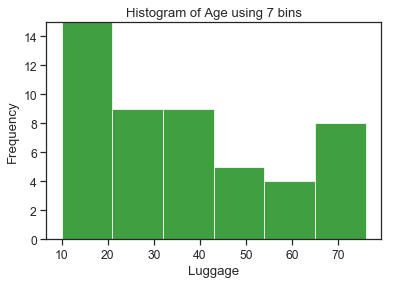

In [80]:
n, bins, patches = plt.hist(Auto['Luggage (cu. ft.)'], 6, facecolor='green', alpha=0.75)
plt.ylim(0, 15)
plt.xlabel("Luggage")
plt.ylabel("Frequency")
plt.title('Histogram of Age using 7 bins')
plt.show()

### 10.	Perform a cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables. This requires the aggregation of the occurrences of each fuel type separately for each drive type. You can use whatever appropriate data structure you which to store the results, but you can display it as as a 2 x 2 table with entries representing the counts. Then, use Matplotlib to create a bar chart graph to visualize of the relationships between these sets of variables (comparing Regular and Premium customer across the two drive types). Your chart should contain appropriate labels for axes. 

In [81]:
Auto["Fuel Type"] = Auto["Fuel Type"].str.strip()
Auto["Fuel Type"].describe()

count         106
unique          2
top       Regular
freq           87
Name: Fuel Type, dtype: object

In [82]:
# Table of Fuel vs. Drive
fuel_drive = pd.crosstab(index=Auto["Fuel Type"], 
                           columns=Auto["Drive Type"])

fuel_drive.index= ["Regular","Premium"]

fuel_drive
# Other ways to do: 
#auto.groupby(["Fuel Type", "Drive Type"]).size()
#pd.crosstab(auto["Fuel Type"],auto["Drive Type"])

Drive Type,Front,Rear
Regular,11,8
Premium,70,17


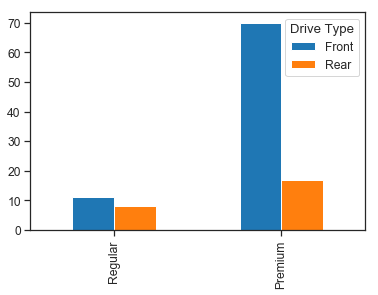

In [83]:
fuel_drive.plot.bar()

### 11.	Create a new dataframe where fuel is “regular” AND MPG is over 21. Call it Auto_sub. Label each section using markup to state what you are doing and what you see

In [84]:
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [85]:
# replacing blank spaces with '_'  
Auto.columns =[column.replace(" ", "_") for column in Auto.columns]
Auto.head()

,Name,Drive_Type,Mileage_(mpg),Fuel_Type,Capacity_(gal),Length_(inches),Wheel_Base_(inches),Width_(inches),Turning_Circle_(feet),Weight_(lbs),Door_Top_(inches),Luggage_(cu._ft.),Front_Shoulder_(inches),Front_Leg_Room_(inches),Front_Head_Room_(inches),Rear_Shoulder_(inches),Rear_Leg_Room_(inches),Rear_Head_Room_(inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [86]:
Auto.sub = Auto.loc[(Auto['Mileage_(mpg)'] == 21.0) & (Auto['Fuel_Type'] == "Regular")]

In [87]:
Auto.sub.tail()

,Name,Drive_Type,Mileage_(mpg),Fuel_Type,Capacity_(gal),Length_(inches),Wheel_Base_(inches),Width_(inches),Turning_Circle_(feet),Weight_(lbs),Door_Top_(inches),Luggage_(cu._ft.),Front_Shoulder_(inches),Front_Leg_Room_(inches),Front_Head_Room_(inches),Rear_Shoulder_(inches),Rear_Leg_Room_(inches),Rear_Head_Room_(inches)
66,Toyota Avalon,Front,21.0,Regular,18.5,192.0,107.0,72.0,40.0,"3,455",53.0,16.0,59.0,41.0,4.5,58.0,30.5,3.0
73,Volkswagen Jetta,Front,21.0,Regular,14.5,172.0,99.0,68.0,36.0,"2,940",51.0,13.0,54.0,41.0,4.0,52.5,25.5,1.5
77,Volvo S70/V70,Front,21.0,Regular,18.5,186.0,105.0,69.0,38.0,"3,305",50.0,15.0,56.0,42.5,3.0,56.5,30.0,3.0
78,Volvo S80,Front,21.0,Regular,21.1,190.0,110.0,72.0,40.0,"3,630",51.5,14.0,58.5,41.5,3.5,56.5,28.5,4.0
102,Chevrolet Tracker,Rear,21.0,Regular,17.4,163.0,98.0,67.0,37.0,"3,055",60.0,28.0,53.0,39.0,4.5,52.5,24.0,4.5


In [88]:
Auto.sub.shape

(14, 18)

In [165]:
#Notebook -2
# correlation values for all numeric variables
#import pandas as pd
import numpy as np

#rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(15, 15))
#corr = Churn.corr()
#corr.style.background_gradient(cmap='RdBu_r')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

                                                    :The end:

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(14,7 ))
Churn[Churn.churn == "No"][num_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
Churn[Churn.churn == "Yes"][num_features].hist(bins=30, color="red", alpha=0.5, ax=ax)